## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time

## Loading file path

In [2]:
filepath = "D:\\CYBER ATTACK DETECTION PROJECT\\DATASET\\Final Dataset for comparision.csv"

In [3]:
# Loading the dataset

df = pd.read_csv(filepath, nrows=10000000)

In [4]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,conn_state_encoded,proto_encoded
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,6,1
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,6,1


In [5]:
# information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration            float64
 1   orig_bytes          int64  
 2   resp_bytes          int64  
 3   missed_bytes        float64
 4   orig_pkts           float64
 5   orig_ip_bytes       float64
 6   resp_pkts           float64
 7   resp_ip_bytes       float64
 8   label               object 
 9   misses_bytes        float64
 10  conn_state_encoded  int64  
 11  proto_encoded       int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 915.5+ MB


In [6]:
# statistical measures on dataset

df.describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,misses_bytes,conn_state_encoded,proto_encoded
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,-8.437321e-02,1.824957e+02,2.934570e+00,2.150090e-02,2.002007e+00,2.761713e+02,3.416330e-02,5.571225e+00,-9.927626e-01,5.986300e+00,1.039763e+00
std,4.382422e+01,5.522816e+05,3.698325e+03,1.535074e+01,4.128157e+02,5.638333e+05,6.231040e+00,3.860911e+03,4.932938e+00,4.438511e-01,2.056215e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
max,9.328003e+04,1.744830e+09,1.166102e+07,2.027200e+04,1.305034e+06,1.781371e+09,9.307000e+03,1.207699e+07,5.792000e+03,1.200000e+01,2.000000e+00


In [7]:
df.shape

(10000000, 12)

In [8]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes',
       'conn_state_encoded', 'proto_encoded'],
      dtype='object')

In [9]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,conn_state_encoded,proto_encoded
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,6,1
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,6,1


In [10]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan     6273278
Benign                        1818231
Okiru                         1628670
DDoS                           264133
C&C                              7298
Attack                           6943
C&C-HeartBeat                    1345
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

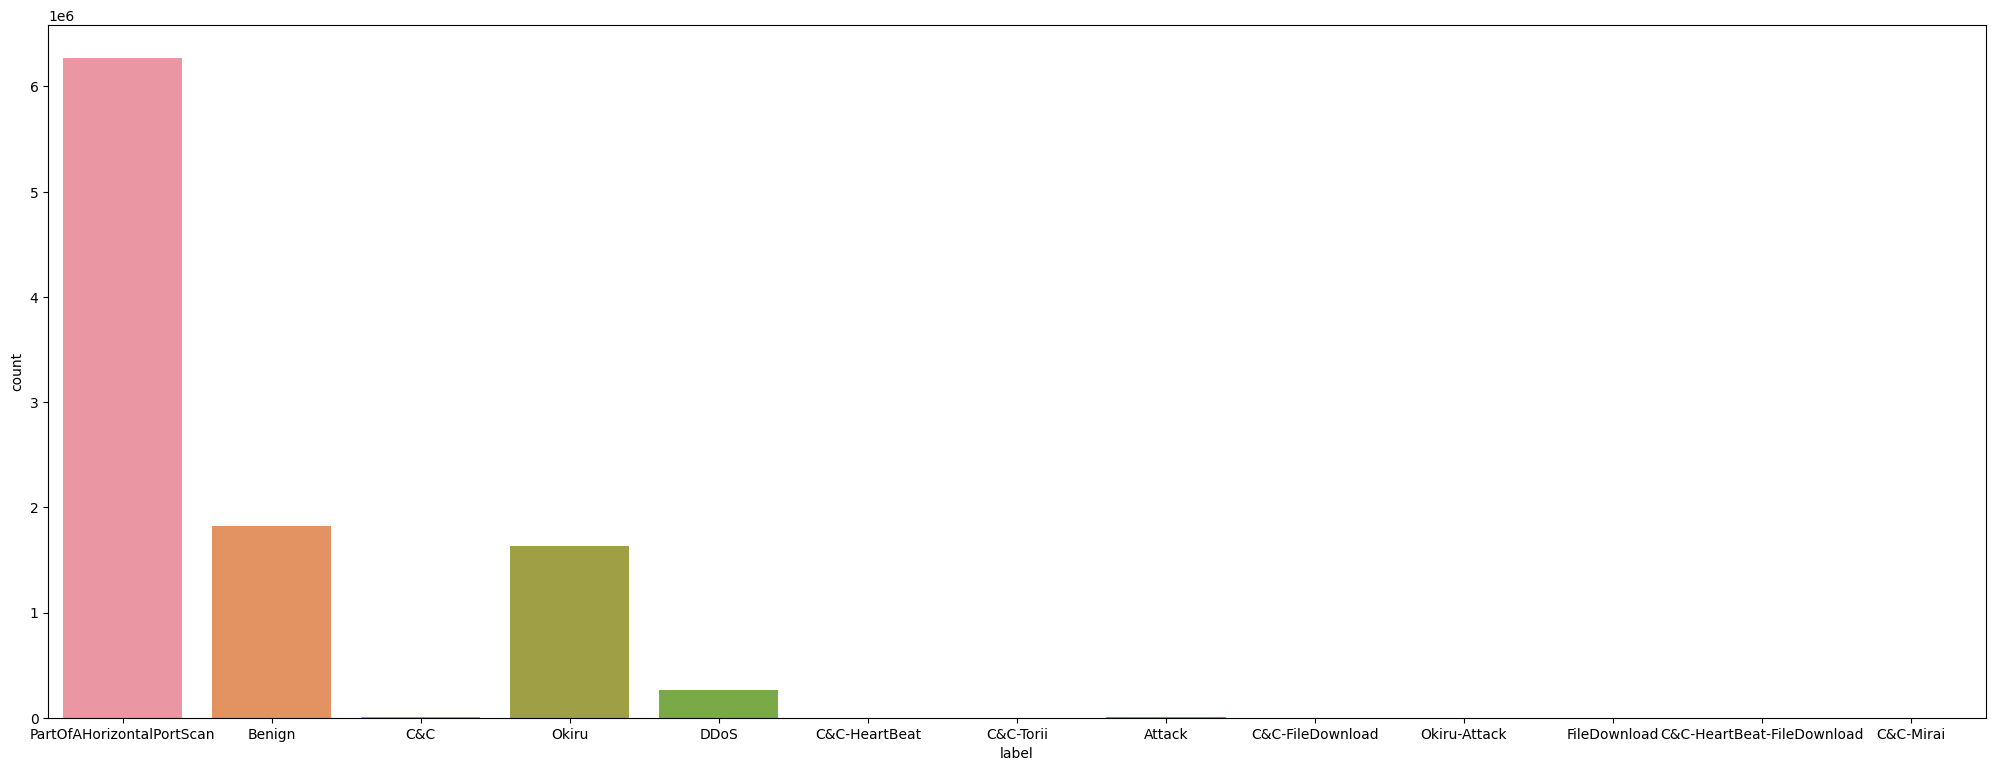

In [11]:
plt.figure(figsize = (25,9))
sns.countplot(x = df['label'])

In [12]:
df['label'] = df['label'].replace(['PartOfAHorizontalPortScan','Okiru','Okiru-Attack','DDoS','C&C','Attack','C&C-HeartBeat','C&C-FileDownload','C&C-Torii','FileDownload','C&C-HeartBeat-FileDownload','C&C-Mirai'], 'Attack')
df['label'] = df['label'].replace(['Benign'],'Normal')
df['label'].value_counts()

label
Attack    8181769
Normal    1818231
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

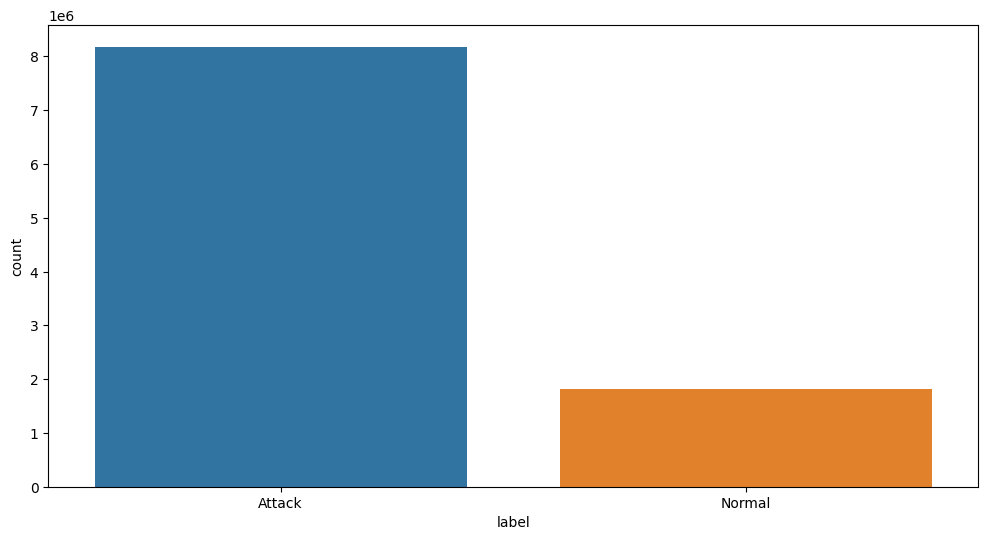

In [13]:
plt.figure(figsize = (12,6))
sns.countplot(x = df['label'])

In [14]:
df.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes','proto_encoded', 'conn_state_encoded']

In [15]:
for col in df.columns:
    print(col)

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
misses_bytes
proto_encoded
conn_state_encoded


In [16]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes', 'proto_encoded', 'conn_state_encoded']


In [17]:
df['label'].value_counts()

label
Attack    8181769
Normal    1818231
Name: count, dtype: int64

## Changing the labels into numerical columns

In [18]:
df['label'].head()

0    Attack
1    Attack
2    Attack
3    Normal
4    Normal
Name: label, dtype: object

In [19]:
# Creating a instance of label Encoder

# le = LabelEncoder()


# label = le.fit_transform(df['label'])

# label

In [20]:
# df.drop("label", axis=1, inplace=True)

# # Appending the array to our dataFrame
# # with column name 'Purchased'
# df["label"] = label

# # printing Dataframe
# df.head()


In [21]:
df['label'].value_counts()

label
Attack    8181769
Normal    1818231
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

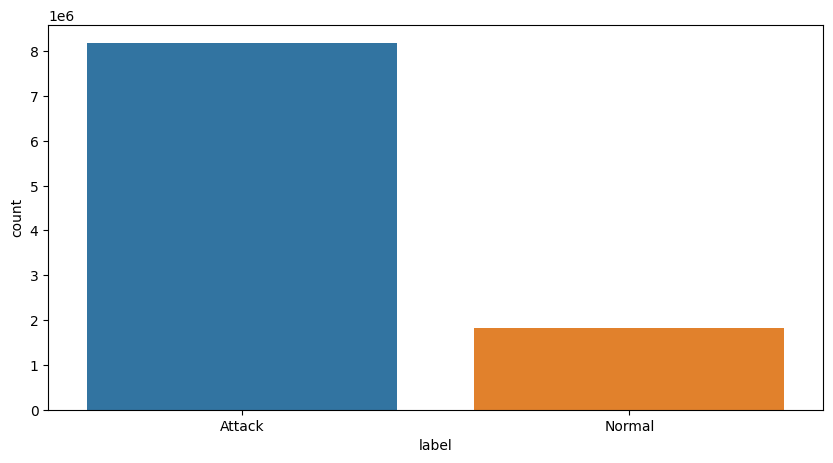

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['label'])

## Splitting the dataset into features and target

In [23]:
# features
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',   'misses_bytes', 'proto_encoded', 'conn_state_encoded']]

# target
Y = df['label']

In [24]:
# shape of feature and target

print('Shape of feature : ',X.shape)
print('Shape of target : ',Y.shape)

Shape of feature :  (10000000, 11)
Shape of target :  (10000000,)


In [25]:
# scaler = StandardScaler()

# scaler.fit(X)
# X_standard = scaler.transform(X)

In [26]:
# print(X_standard)

## Splitting the dataset into features and target

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Training Random Forest Model

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, pos_label='Attack')
recall = recall_score(Y_test, y_pred, pos_label='Attack')
f1 = f1_score(Y_test, y_pred, pos_label='Attack')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.922826
Precision: 0.9567805584011025
Recall: 0.9485324400590031
F1 Score: 0.9526386461381355


In [29]:
# start = time.time()
# dt = DecisionTreeClassifier()
# dt.fit(X_train, Y_train)

# dt_pred = dt.predict(X_test)


# # Evaluate Decision Tree performance
# dt_acc = accuracy_score(Y_test, dt_pred)
# dt_f1 = f1_score(Y_test, dt_pred,average='macro',  zero_division=1)
# dt_recall = recall_score(Y_test, dt_pred,average='macro',  zero_division=1)
# dt_precision = precision_score(Y_test, dt_pred,average='macro', zero_division=1)
# end = time.time()

# dt_time = end - start

In [30]:
# print('Decision Tree Accuracy : ',dt_acc)
# print('Decision Tree F1 Score : ',dt_f1)
# print('Decision Tree Recall : ',dt_recall)
# print('Decision Tree Precision : ',dt_precision)
# print('Decision Tree Time : ',dt_time)

## Printing Classification Report

In [31]:
print('Random Forest Classifier : ')
print(classification_report(Y_test, dt_pred, zero_division=1))

Random Forest Classifier : 


NameError: name 'dt_pred' is not defined

## Making a Predicition System

In [ ]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes',
       'proto_encoded', 'conn_state_encoded'],
      dtype='object')

In [ ]:
# input_data = (-1,-1,-1,	0,2,80,0,0,-1,6,1)

# # changing data to numpy array 
# input_data_array = np.asarray(input_data)

# # reshape the array as we are predicting for one instance
# input_data_reshaped =  input_data_array.reshape(1,-1)


# # standarize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data)


# result = rf.predict(std_data)
# print("The prediction is : ",result)

# if (result[0] == 0):
#   print("No Attack has been found.")
# else:
#   print("Attack has been found")

In [ ]:
# import pickle 
# # importing the library

# filename = "trained_model.pkl"
# pickle.dump(rf, open(filename, 'wb'))
# # saving file

## Making Y_train and rf_pred same number of sample

In [ ]:
# print(Y_train.shape)
# print(rf_pred.shape)

In [ ]:
# Y_train = Y_train[:rf_pred.shape[0]]

In [ ]:
# print(Y_train.shape)
# print(rf_pred.shape)

## Confusion Matrix

In [ ]:
# plt.figure(figsize = (10,6))
# cm = confusion_matrix(Y_train, rf_pred)
# plt.title('Heatmap of Confusion Matrix of Random Forest', fontsize = 15)
# sns.heatmap(cm, annot= True)
# plt.show()